# Lab Work 1

Step 1 - Import Library

In [6]:
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv("dataset.csv")

Step 3 - Data Understanding

In [8]:
# inspect first data
data.head()

# check data size
data.shape

#check data information
data.info()

#check data description
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Step 4 - Visualize data

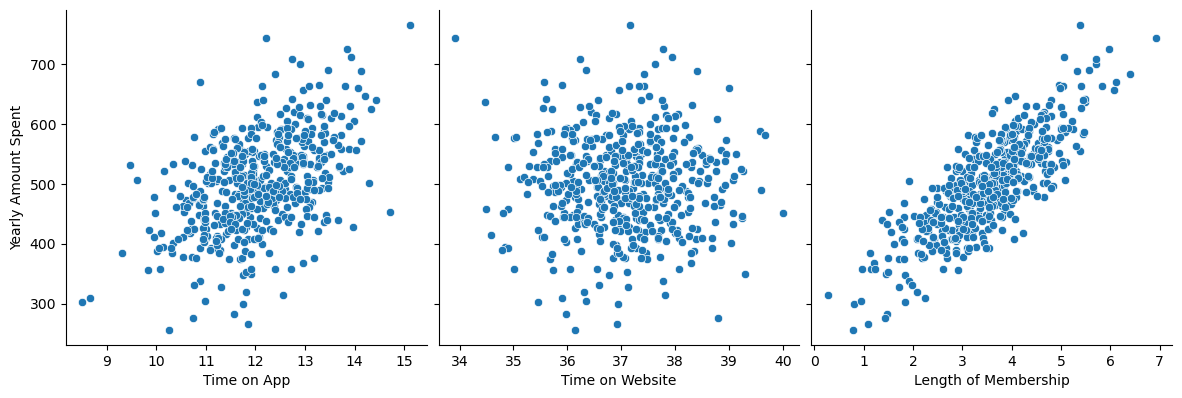

ValueError: could not convert string to float: 'mstephenson@fernandez.com'

In [9]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the data using pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', height=4, aspect=1, kind='scatter')
plt.show()

# visualize the data correlation using heatmaps
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Step 5 - Build Regression Model

In [10]:
# X is independen variabel, Y is dependen variable

X = data['Length of Membership']
y = data['Yearly Amount Spent']


Split training and testing data using 70 : 30 ratio

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)




Build regression Model

In [ ]:
#r Taining model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS (y_train,X_train_sm).fit()

Visualize model

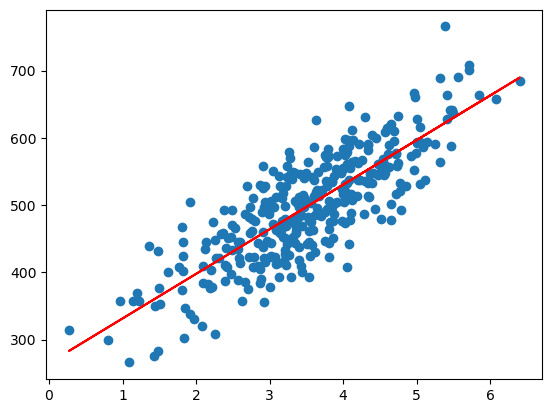

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Step 6 - Residual Analysis

C:\Users\filla\AppData\Local\Temp\ipykernel_8052\857319167.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


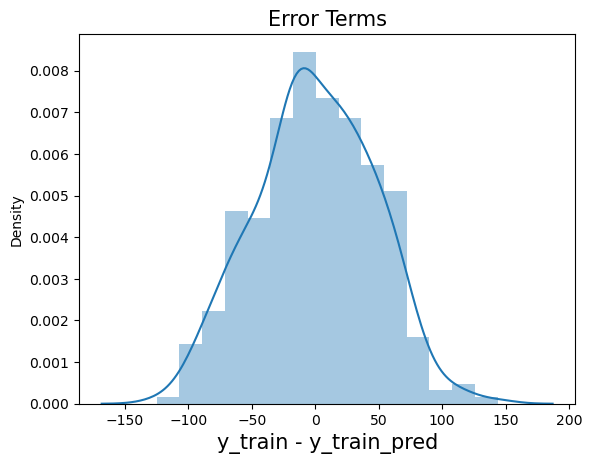

<function matplotlib.pyplot.show(close=None, block=None)>

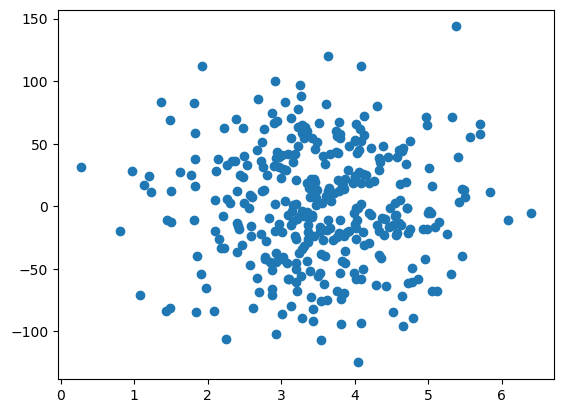

In [ ]:
# Make prediction
y_train_pred = lr.predict(X_train_sm)

# Calculate residual
res = (y_train - y_train_pred)

# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

# Scatter plot residual
plt.scatter(X_train,res)
plt.show

Step 7 - Make a Prediction Using Testing Data

In [ ]:
# Make a prediction using testing data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

Evaluate Using R^2

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Step 8 - Visualize the result

<function matplotlib.pyplot.show(close=None, block=None)>

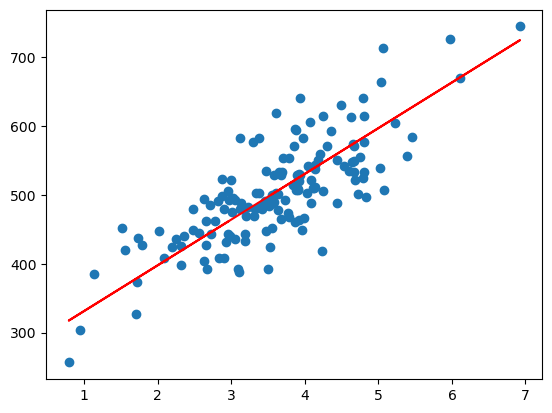

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test,y_test_pred, 'r')
plt.show

# Lab work 2

Step 1 - Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2 - Load Data

Step 3 - Preprocessing -> Feature Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y =sc_y.fit_transform(y.reshape(-1,1))

Step 4 - Fit SVR Model

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

c:\Users\filla\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Step 5 - Visualize

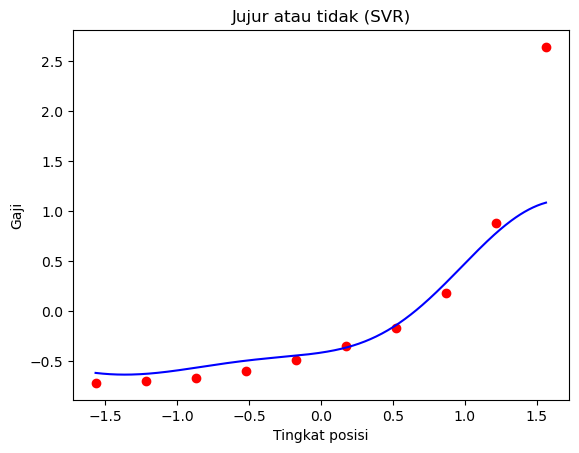

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1,1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

Step 6 - Make a Prediction

In [ ]:
# Create 2d Array
tingkat_posisi_prediksi = np.array([[6.5]])
# Scaled predicted data
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
#Make a prediction
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Rescale the result --> back to the original data
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1,1))

Step 7 - Print result

In [ ]:
# Show result
print("Prediksi Gaji untuk TIngkat Posisi 6,5:", gaji_prediksi[0])

Prediksi Gaji untuk TIngkat Posisi 6,5: [170370.0204065]


Step 8 - Validation

Step 9 - Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

# MAE
mae = mean_absolute_error(y_actual, y_pred)

# MSE
mse = mean_squared_error(y_actual, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# Lab Assignment

Step 1 - Import Library

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 2 - Import data

In [14]:
datacoy = pd.read_csv("insurance.csv")
datacoy.head(20)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Step 4 - Visualize data

c:\Users\filla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


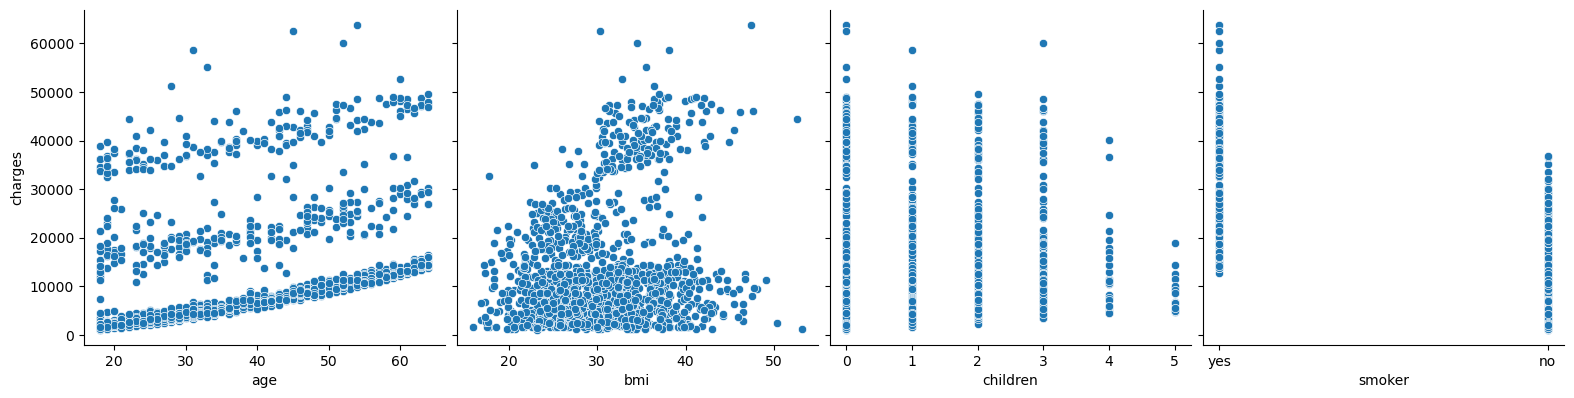

In [15]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# visualize the data using pairplot
sns.pairplot(datacoy, x_vars=['age','bmi','children','smoker'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()



<Axes: >

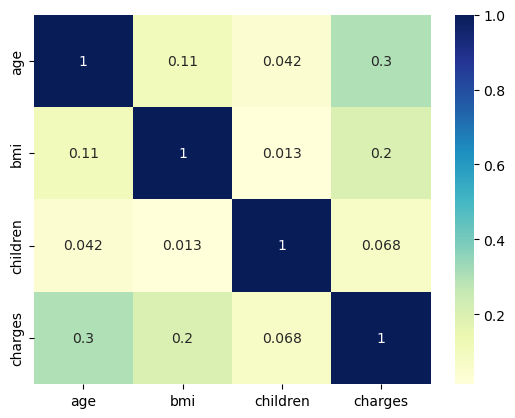

In [16]:
# visualize the data correlation using heatmaps
numeric_data = datacoy.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)


Step 5 - Build a regression model

In [25]:
# X is independen variabel, Y is dependen variable
X = datacoy['bmi']
y = datacoy['charges']

Step 6 - Feature Extraction

In [ ]:
le = LabelEncoder() # initiate LabelEncoder object
datacoy['smoker'] = le.fit_transform(datacoy['smoker']) # encoding

Step 7 - Split data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Step 8- Create Linear Regression model

In [27]:
#r Taining model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS (y_train,X_train_sm).fit()

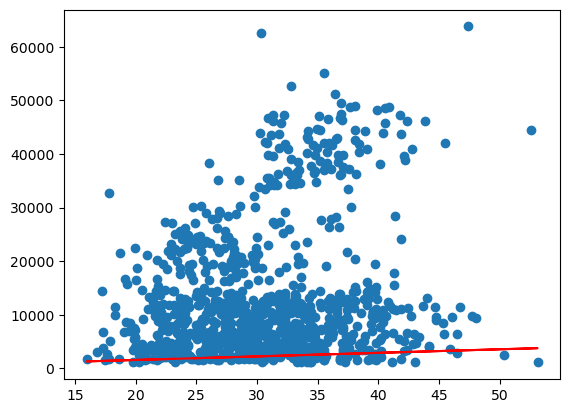

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Step 9 - Residual Analisis

C:\Users\filla\AppData\Local\Temp\ipykernel_3040\857319167.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


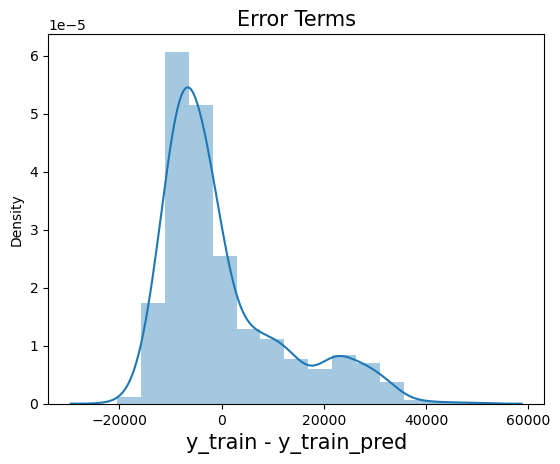

<function matplotlib.pyplot.show(close=None, block=None)>

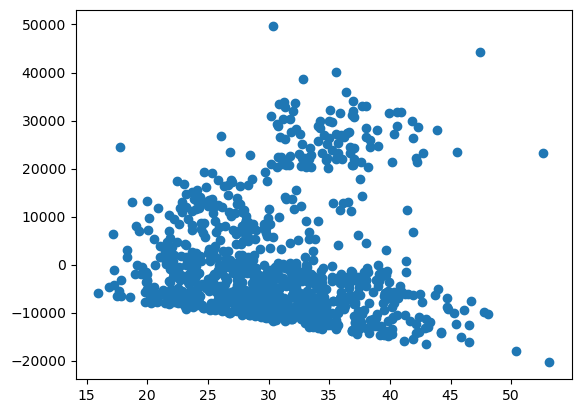

In [28]:
# Make prediction
y_train_pred = lr.predict(X_train_sm)

# Calculate residual
res = (y_train - y_train_pred)

# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

# Scatter plot residual
plt.scatter(X_train,res)
plt.show

Step 7 - Make a Prediction

In [29]:
# Make a prediction using testing data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

Evaluate using R^2

In [30]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Step 8 -Visualize The Result

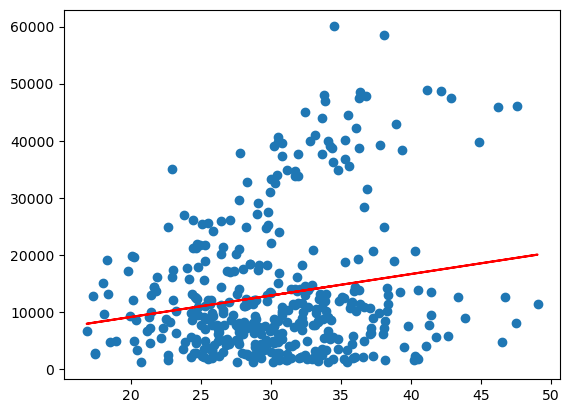

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()